# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [1]:
import requests
from tqdm.auto import tqdm

In [7]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [8]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [6]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [9]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [12]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/14 [00:00<?, ?it/s]

In [74]:
#id вакансии
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()
vacancy


{'id': '43326020',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Специалист по экономической безопасности',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
 'contacts': None,
 'description': '<p><strong>Обязанности:</strong></p> <p> </p> <ul> <li>Поиск и анализ информации в отношении клиентов/контрагентов Банка для оценки уровня кредитных рисков, рисков деловой репутации, иных рисков сотрудничества с контрагентами, в т.ч. в рамках закупочных процедур, реализации строительных программ, б

In [91]:
vacancy.get('description')

'<p><strong>Обязанности:</strong></p> <p> </p> <ul> <li>Поиск и анализ информации в отношении клиентов/контрагентов Банка для оценки уровня кредитных рисков, рисков деловой репутации, иных рисков сотрудничества с контрагентами, в т.ч. в рамках закупочных процедур, реализации строительных программ, благотворительной деятельности и пр.;</li> <li>Мониторинг показателей отрасли и прогноз возможных рисковых событий;</li> <li>Подготовка заявительских материалов в правоохранительные органы по фактам/попыткам нанесения ущерба Банку;</li> <li>Исполнение запросов, поступающих от правоохранительных органов;</li> <li>Подготовка экспертного мнения при проведении служебных расследований;</li> <li>Подготовка предложений по оптимизации и совершенствованию бизнес-процессов</li> <li>Информационная поддержка бизнеса;</li> <li>Экспертная оценка жалоб и заявлений клиентов Банка;</li> <li>Подготовка предложений по разработкам/доработкам АБС Банка и ПСИ;</li> </ul> <p> </p> <p><strong>Требования:</strong></p

In [76]:
sber = '3529'
url = f'https://api.hh.ru/vacancies?employer_id={sber}'
res = requests.get(url)
vacancies = res.json()
vacancies

{'items': [{'id': '78424462',
   'premium': False,
   'name': 'Переводчик',
   'department': {'id': '3529-3529-lead',
    'name': 'Сбер. Экспертам и руководителям'},
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': None,
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': None,
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2023-03-22T19:13:35+0300',
   'created_at': '2023-03-22T19:13:35+0300',
   'archived': False,
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=78424462',
   'insider_interview': None,
   'url': 'https://api.hh.ru/vacancies/78424462?host=hh.ru',
   'adv_response_url': None,
   'alternate_url': 'https://hh.ru/vacancy/78424462',
   'relations': [],
   'employer': {'id': '3529',
    'name': 'СБЕР',
    'url': 'https://api.hh.ru/employers/3529',
    'alternate_url': 'https://hh.ru/employer/3529',
    'lo

In [206]:
#DataFrame
import pandas as pd
sber = '3529'
url = f'https://api.hh.ru/vacancies?employer_id={sber}'
res = requests.get(url)
vacancies = res.json()

df = pd.DataFrame(columns=['published_at', 'name', 'responsibility', 'requirement'])


for vacancy in vacancies['items']:
    published_at = vacancy['published_at']
    name = vacancy['name']
    responsibility = vacancy['snippet']['responsibility']
    requirement = vacancy['snippet']['requirement']
    
    df = df.append({
        'published_at': published_at,
        'name': name,
        'responsibility': responsibility,
        'requirement': requirement
    }, ignore_index=True)

/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_61017/3838255153.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_61017/3838255153.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_61017/3838255153.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_61017/3838255153.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_6

In [153]:
df

,published_at,name,responsibility,requirement
0,2023-03-22T13:26:03+0300,QA engineer Junior (нагрузочное тестирование),Написание сценариев нагрузочного тестирования ...,"Знание любого языка программирования, наличие ..."
1,2023-03-22T11:53:24+0300,Тестировщик (QA – engineer),Проведение функционального/регрессионного тест...,Уверенное знание методологии тестирования ПО. ...
2,2023-03-10T11:13:27+0300,Стажер,Исследования и создание прототипов решений на ...,Неоконченное высшее техническое образование с ...
3,2023-03-14T11:22:39+0300,Финансовый консультант,Встречаться с 7-15 клиентами в день для выдачи...,"Специалист со средним профессиональным, неполн..."
4,2023-03-24T13:15:24+0300,Project manager,"Ведение задач совместно с командой DS, декомпо...",None
5,2023-03-25T13:03:15+0300,Эксперт по коммуникациям и событийным проектам,Разработка и реализация годовых локальных план...,Являешься экспертом в сфере маркетинга и комму...
6,2023-03-21T11:23:37+0300,Менеджер по работе с клиентами,Продавать банковские продукты и сервисы Сбера....,"Специалист со средним профессиональным, неполн..."
7,2023-03-25T11:14:03+0300,Менеджер по маркетингу и коммуникациям,Участие в разработке и реализации маркетинговы...,Высшее образование (маркетинг\пиар\журналистик...
8,2023-03-24T14:27:35+0300,Project manager отдела Sberbank.ru,"Формировать roadmap, наполнять и приоритизиров...",Имеете опыт на аналогичных позициях от 2-х лет...
9,2023-03-24T12:56:01+0300,Ведущий специалист,"Работа с большим массивом документов, отражени...",Высшее экономическое\бухгалтерское образование...


In [207]:
#Datetime
import pandas as pd
sber = '3529'
url = f'https://api.hh.ru/vacancies?employer_id={sber}'
res = requests.get(url)
vacancies = res.json()

df = pd.DataFrame(columns=['published_at', 'name', 'responsibility', 'requirement'])


for vacancy in vacancies['items']:
    published_at = pd.to_datetime(vacancy['published_at'])
    name = vacancy['name']
    responsibility = vacancy['snippet']['responsibility']
    requirement = vacancy['snippet']['requirement']
    
    df = df.append({
        'published_at': published_at,
        'name': name,
        'responsibility': responsibility,
        'requirement': requirement
    }, ignore_index=True)


/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_61017/1676675930.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_61017/1676675930.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_61017/1676675930.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_61017/1676675930.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/1k/rp772snj2y55b6h_cpgh3prh0000gn/T/ipykernel_6

In [157]:
df

,published_at,name,responsibility,requirement
0,2023-03-22 13:26:03+03:00,QA engineer Junior (нагрузочное тестирование),Написание сценариев нагрузочного тестирования ...,"Знание любого языка программирования, наличие ..."
1,2023-03-22 11:53:24+03:00,Тестировщик (QA – engineer),Проведение функционального/регрессионного тест...,Уверенное знание методологии тестирования ПО. ...
2,2023-03-10 11:13:27+03:00,Стажер,Исследования и создание прототипов решений на ...,Неоконченное высшее техническое образование с ...
3,2023-03-14 11:22:39+03:00,Финансовый консультант,Встречаться с 7-15 клиентами в день для выдачи...,"Специалист со средним профессиональным, неполн..."
4,2023-03-24 13:15:24+03:00,Project manager,"Ведение задач совместно с командой DS, декомпо...",None
5,2023-03-25 13:03:15+03:00,Эксперт по коммуникациям и событийным проектам,Разработка и реализация годовых локальных план...,Являешься экспертом в сфере маркетинга и комму...
6,2023-03-21 11:23:37+03:00,Менеджер по работе с клиентами,Продавать банковские продукты и сервисы Сбера....,"Специалист со средним профессиональным, неполн..."
7,2023-03-25 11:14:03+03:00,Менеджер по маркетингу и коммуникациям,Участие в разработке и реализации маркетинговы...,Высшее образование (маркетинг\пиар\журналистик...
8,2023-03-24 14:27:35+03:00,Project manager отдела Sberbank.ru,"Формировать roadmap, наполнять и приоритизиров...",Имеете опыт на аналогичных позициях от 2-х лет...
9,2023-03-25 15:26:56+03:00,Ведущий специалист судебного и исполнительного...,Наша команда помогает урегулировать задолженно...,"Специалист со средним специальным, неоконченны..."


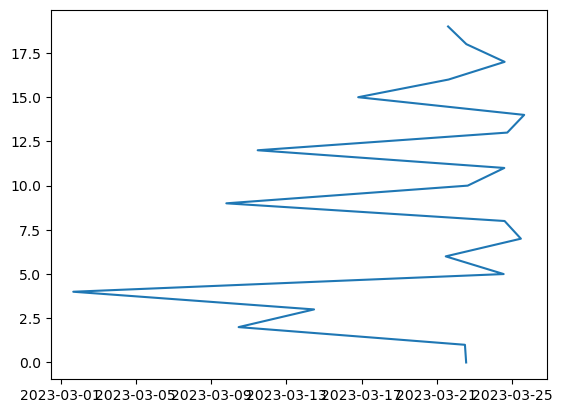

In [192]:
#график

plt.plot(df['published_at'], df.index)

plt.show()




In [186]:
#Даты в дни недели и день, когда больше вакансий

counts = df['published_at'].dt.day_name().value_counts()

most_day = counts.idxmax()

most_day

'Friday'

In [219]:
#Найдите вакансии с использованием python, которые вам интересны

choosing = df[df['name'].str.contains('менеджер', case=False)]

choosing

,published_at,name,responsibility,requirement
5,2023-03-21 11:23:37+03:00,Менеджер по работе с клиентами,Продавать банковские продукты и сервисы Сбера....,"Специалист со средним профессиональным, неполн..."
8,2023-03-10 10:20:50+03:00,"Старший клиентский менеджер (Ставропольская, 254)",Доброжелателен и готов помогать клиентам. Пред...,"Специалист со средним профессиональным, неполн..."
11,2023-03-11 11:30:18+03:00,Старший менеджер по работе с клиентами,Консультировать клиентов по всем продуктам и у...,"Специалист с неполным высшим, средним професси..."
13,2023-03-20 18:23:27+03:00,Клиентский менеджер прямых продаж,Выезжать к клиентам на индивидуальные консульт...,"Специалист со средним профессиональным, неполн..."
17,2023-03-06 17:16:38+03:00,Менеджер по обслуживанию,Доброжелателен и готов помогать клиентам. Осущ...,"Специалист со средним профессиональным, неполн..."


In [222]:
#Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
from collections import Counter

skills = []
for req in choosing['requirement']:
    skills.extend(req.split())

skills_counter = Counter(skills)
print(skills_counter.most_common(1))


[('высшим', 9)]


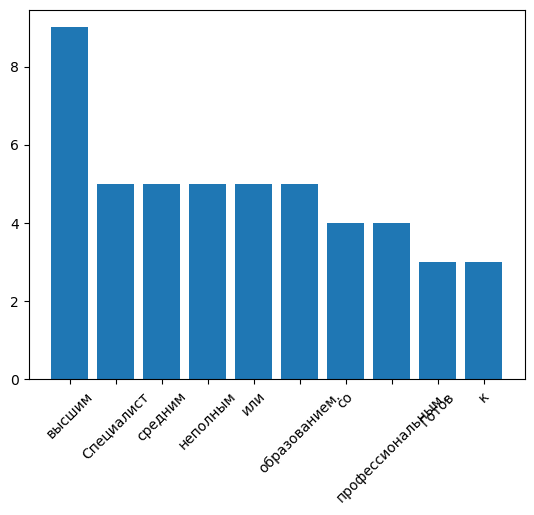

In [230]:
#Постройте график наиболее востребованных навыков
import matplotlib.pyplot as plt

labels, values = zip(*skills_counter.most_common(10))

plt.bar(labels, values)
plt.xticks(rotation=45)
plt.show()